# Patient’s Postoperative Recovery Area Prediction

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('post-operative.data',header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       90 non-null     object
 1   1       90 non-null     object
 2   2       90 non-null     object
 3   3       90 non-null     object
 4   4       90 non-null     object
 5   5       90 non-null     object
 6   6       90 non-null     object
 7   7       90 non-null     object
 8   8       90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [8]:
data.rename(columns=
               {0 : 'core_temp' ,
                1 : 'surf_temp' ,
                2 : 'o2_satur' ,
                3 : 'bp' ,
                4 : 'surf_temp_stbl' ,
                5 : 'core_temp_stbl' ,
                6 : 'bp_stbl' ,
                7 : 'comfort' ,
                8 : 'decision'},inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   core_temp       90 non-null     object
 1   surf_temp       90 non-null     object
 2   o2_satur        90 non-null     object
 3   bp              90 non-null     object
 4   surf_temp_stbl  90 non-null     object
 5   core_temp_stbl  90 non-null     object
 6   bp_stbl         90 non-null     object
 7   comfort         90 non-null     object
 8   decision        90 non-null     object
dtypes: object(9)
memory usage: 6.5+ KB


In [10]:
data['core_temp'] = data['core_temp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
data['surf_temp'] = data['surf_temp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
data['bp'] = data['bp'].replace({'high' : 2 , 'mid' : 1 ,'low' : 0})
data['surf_temp_stbl'] = data['surf_temp_stbl'].replace({'stable' : 2 , 'mod_stable' : 1 ,'unstable' : 0})
data['core_temp_stbl'] = data['core_temp_stbl'].replace({'stable' : 2 , 'mod_stable' : 1 ,'mod-stable' : 1 ,'unstable' : 0})
data['bp_stbl'] = data['bp'].replace({'stable' : 2 , 'mod_stable' : 1 ,'unstable' : 0})
data['o2_satur'] = data['o2_satur'].replace({'poor' : 0 , 'fair' : 1 , 'good' : 2 , 'excellent' : 3})
data['decision'] = data['decision'].replace({'I' : 0 , 'A' : 1 ,'A ' : 1, 'S' : 2})

In [12]:
data['comfort'].value_counts()

10    65
15    19
?      3
05     2
07     1
Name: comfort, dtype: int64

In [13]:
data['comfort'] = data['comfort'].str.replace('?' , '10').astype(int)

C:\Users\bhave\AppData\Local\Temp/ipykernel_17264/3920981678.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['comfort'] = data['comfort'].str.replace('?' , '10').astype(int)


In [14]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(data.drop('decision', axis = 1))
scaled_features = scaler.transform(data.drop('decision', axis = 1))
 
data_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_feat.head()

,core_temp,surf_temp,o2_satur,bp,surf_temp_stbl,core_temp_stbl,bp_stbl,comfort
0,0.112509,-1.345166,1.045478,-0.570352,1.0,0.284975,-0.570352,1.810021
1,0.112509,1.607638,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320
2,1.800141,-1.345166,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320
3,0.112509,-1.345166,-0.956501,1.330821,1.0,-3.660837,1.330821,1.810021
4,0.112509,0.131236,1.045478,1.330821,1.0,0.284975,1.330821,-0.403320


In [15]:
predictor_variables = list(set(data_feat.columns.to_list()))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
      scaled_features, data['decision'], test_size = 0.25)

In [19]:
X_test

array([[-1.57512306,  0.13123574,  1.04547753,  1.33082093,  1.        ,
         0.28497536,  1.33082093, -0.40331988],
       [-1.57512306,  0.13123574, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183,  1.81002092],
       [ 0.11250879, -1.34516637, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [-1.57512306,  1.60763785,  1.04547753, -0.57035183, -1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  0.13123574,  1.04547753, -0.57035183, -1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  0.13123574,  1.04547753, -0.57035183,  1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  1.60763785, -0.95650071, -0.57035183,  1.        ,
         0.28497536, -0.57035183, -0.40331988],
       [ 0.11250879,  0.13123574,  1.04547753, -0.57035183,  1.        ,
         0.28497536, -0.57035183,  1.81002092],
       [ 0.11250879,  0.13123574

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial',fit_intercept=True, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [21]:
train_pred = model.predict_proba(X_train)
test_pred = model.predict_proba(X_test)

In [22]:
train_class_pred = model.predict(X_train)
test_class_pred = model.predict(X_test)

In [24]:
Dataframe = pd.DataFrame(test_class_pred,y_test).reset_index()
Dataframe.columns = ['predicted', 'actual']

In [25]:
Dataframe

,predicted,actual
0,1,1
1,2,1
2,0,1
3,1,1
4,1,1
5,1,1
6,2,1
7,1,1
8,1,1
9,2,1


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.746268656716418
The accuracy on test data is  0.6086956521739131


In [31]:
cm = confusion_matrix(y_test, test_class_pred)
print(cm)

[[ 0  1  0]
 [ 0 14  0]
 [ 0  8  0]]


<AxesSubplot:>

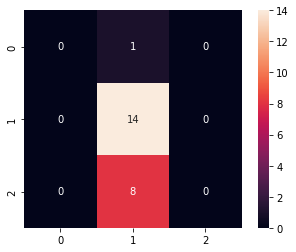

In [32]:
sns.heatmap(cm,square = True,annot = True)